<a href="https://colab.research.google.com/github/klipbn/klip_alex/blob/main/analysis_sales_computer_games/analysis_sales_computer_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ продаж компьютерных игр

**Описание проекта** 

Интернет-магазине «Стримчик», продаёт по всему миру компьютерные игры. 
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед нами данные до 2016 года. Требуется спланировать компанию на 2017 год.  

**Этапы проведения исследования** 


**Шаг 1.** Изучение общей информации о данных

Путь к файлу:  
- ~/datasets/games.csv. [Скачать датасет](https://code.s3.yandex.net/datasets/games.csv)   

**Шаг 2.** Предобработка данных  


**Шаг 3.** Исследовательский анализ данных

- Оценить, сколько игр выпускалось в разные годы. Важны ли данные за все периоды.  
- Оценить, как менялись продажи по платформам. Выберать платформы с наибольшими суммарными продажами и построить распределение по годам. Определить характерный срок появления новых и исчезновения старых платформ.  
- Выбрать актуальный период, на основе которого построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.  
- Определить какие платформы лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ.  
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.  
- Оценить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформировать выводы.  
- Соотнести выводы с продажами игр на других платформах.  
- Оценить влияние на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах. Выделяются ли жанры с высокими и низкими продажами.   

**Шаг 4.** Портрет пользователя каждого региона  

Определить для пользователя каждого региона (NA, EU, JP, Other):

- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Определить влияет ли рейтинг ESRB на продажи в отдельном регионе.

**Шаг 5**. Проверка гипотез

- Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

Задайте самостоятельно пороговое значение alpha.
Поясните:

- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

**Шаг 6**. Вывод

## **Шаг 1.** Изучение общей информации о данных

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as mt

In [ ]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv') # читаем данные

Посмотрим общую информацию:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Описание данных

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (возрастная категория).

Аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию.  

*Действующие*  
- EC (Early childhood) — Для детей младшего возраста.  
- E (Everyone) — Для всех.  
- E10+ (Everyone 10 and older) — Для всех старше 10 лет.  
- T (Teen) — Подросткам.    
- M (Mature) — От 17 лет.  
- AO (Adults Only 18+) — Только для взрослых.   
- RP (Rating Pending) — Рейтинг ожидается.

*Устаревшие*  
- K-A (Kids to Adults)— Для детей и взрослых.  

In [ ]:
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [ ]:
df['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

In [ ]:
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [ ]:
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [ ]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод

В данных имеются пропуски.  
Требуется колонки к строчному регистру.  
Заполнить пропуски.  
Изменить тип данных для колонок с рейтингом и с годом выпуска игры.

## **Шаг 2.** Предобработка данных

- Замените названия столбцов (приведите к нижнему регистру);  
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;  
- Обработайте пропуски при необходимости:  
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;  
- Опишите причины, которые могли привести к пропускам;  
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;  
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Посмотрим процент пропущенных значения в годах выпуска игр:

In [ ]:
f"{(df['year_of_release'].isna().sum() / len(df)):.1%}"

'1.6%'

In [ ]:
df.dropna(subset=['year_of_release'], inplace = True)

In [ ]:
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

In [ ]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
df.dropna(subset=['name'], inplace = True)

In [ ]:
df['year_of_release'] = (pd.to_datetime(df['year_of_release'], format='%Y')).dt.year

In [ ]:
df.loc[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [ ]:
df['critic_score'] = df['critic_score'].fillna(df['critic_score'].mean())

In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd - to be determined (подлежит уточнению)

In [ ]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,68.994363,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.000000,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,68.994363,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.000000,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,68.994363,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.000000,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.000000,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.000000,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,68.994363,tbd,E


In [ ]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

In [ ]:
df['user_score'] = df['user_score'].astype('float')

In [ ]:
df['user_score'] = df['user_score'].fillna(df['user_score'].mean())

In [ ]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

## Шаг 3. Исследовательский анализ данных

Посмотрите, сколько игр выпускалось в разные годы.   
Важны ли данные за все периоды?  
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?  
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов.   Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.    
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.  
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.  
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.  
Соотнесите выводы с продажами игр на других платформах.  
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?  

#### Посмотрите, сколько игр выпускалось в разные годы.
Важны ли данные за все периоды?

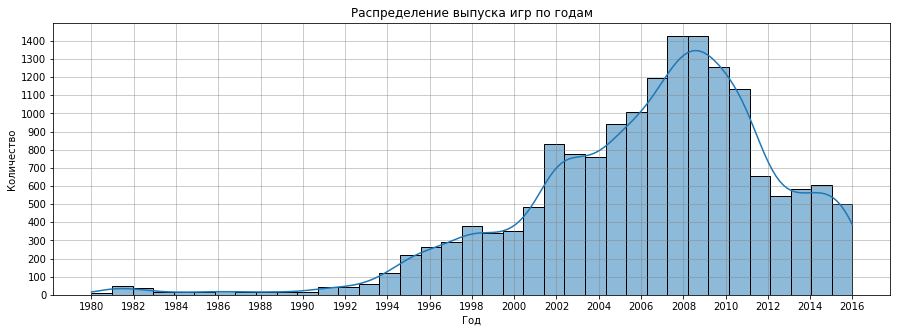

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="year_of_release", kde=True, bins=37)
plt.title('Распределение выпуска игр по годам')
plt.ylabel('Количество')
plt.xlabel('Год')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.xticks(np.arange(1980, 2017, 2))
plt.yticks(np.arange(0, 1500, 100))
plt.show()

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Создадим столбец с общим числом проданных игры:

In [ ]:
def total_sales(row):
  total_sales = row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']
  return total_sales

In [ ]:
df['total_sales'] = df.apply(total_sales, axis=1)

In [ ]:
df_platfrom_sales = df.pivot_table(values='total_sales', index='platform', aggfunc='sum').sort_values(by='total_sales', ascending=False)

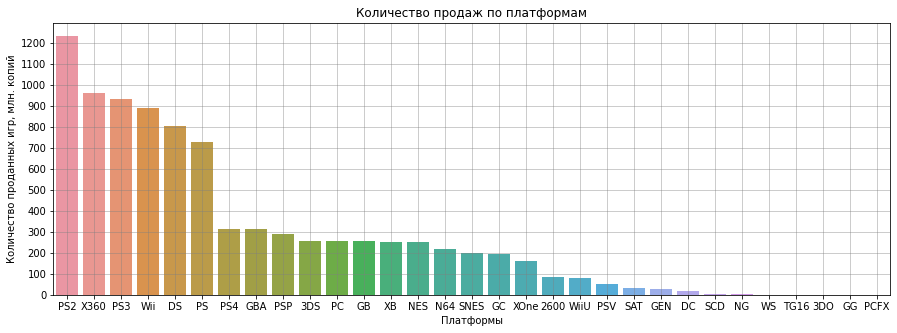

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_platfrom_sales, x=df_platfrom_sales.index, y="total_sales")
plt.title('Количество продаж по платформам')
plt.ylabel('Количество проданных игр, млн. копий')
plt.xlabel('Платформы')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.yticks(np.arange(0, 1300, 100))
plt.show()

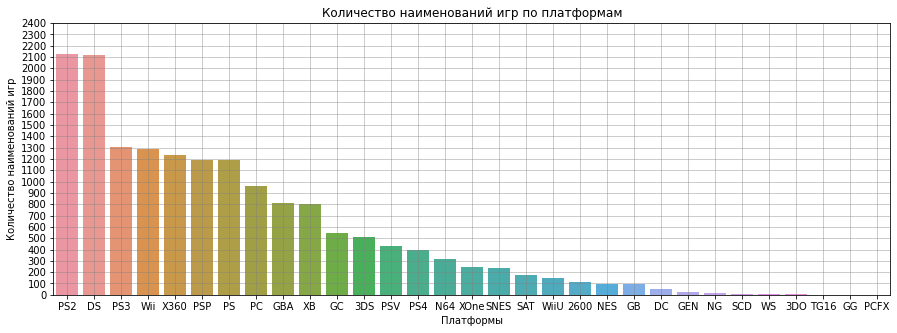

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x='platform', data=df, order = df['platform'].value_counts().index)
plt.title('Количество наименований игр по платформам')
plt.ylabel('Количество наименований игр')
plt.xlabel('Платформы')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.yticks(np.arange(0, 2500, 100))
plt.show()

In [ ]:
df_platfrom_sales_top_11 = df_platfrom_sales.head(11)

In [ ]:
df_platfrom_year_top_11 = df[df['platform'].isin(list(df_platfrom_sales_top_11.index))].reset_index(drop=True)

In [ ]:
df_platfrom_year_group_top_11 = df_platfrom_year_top_11.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

In [ ]:
df_platfrom_year_group_top_11

platform,3DS,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,,
1985,NaN,0.02,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,12.87,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,10.58,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,11.27,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,3.26,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,4.74,144.53,NaN,NaN,NaN,NaN,NaN,NaN


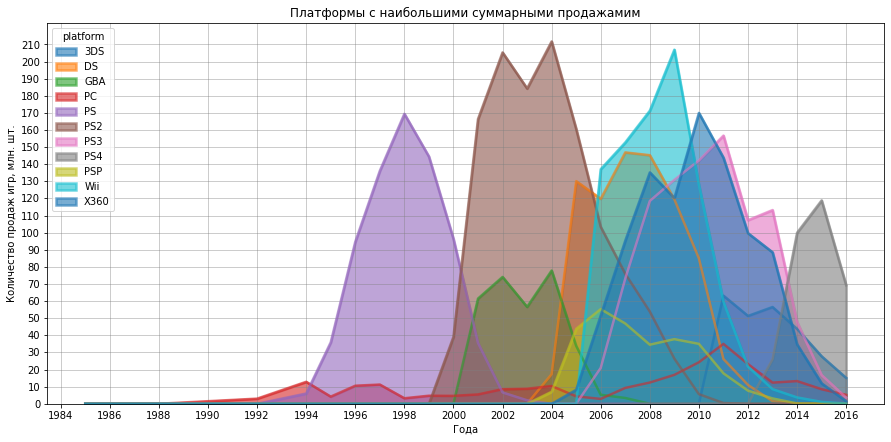

In [ ]:
df_platfrom_year_group_top_11.plot.area(stacked=False, figsize=(15, 7), alpha=.6, linewidth=2.5)
plt.title('Платформы с наибольшими суммарными продажамим')
plt.ylabel('Количество продаж игр, млн. шт.')
plt.xlabel('Года')
plt.grid(color='grey', axis='both', alpha=.5)
plt.yticks(np.arange(0, 220, 10))
plt.xticks(np.arange(1984, 2017, 2))
plt.show()

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

In [ ]:
df_actual = (df_platfrom_year_top_11[df_platfrom_year_top_11['year_of_release'] >= 2010]).reset_index(drop=True)

In [ ]:
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.000000,6.30000,E,21.82
1,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.20000,M,21.05
2,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.10000,M,16.27
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,68.994363,7.12633,NaN,15.13
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.000000,3.40000,M,14.73


In [ ]:
df_actual['platform'].value_counts()

PS3     889
X360    680
3DS     512
DS      507
PSP     500
PC      479
Wii     450
PS4     392
PS2      45
Name: platform, dtype: int64

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [ ]:
df_actual_group = df_actual.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

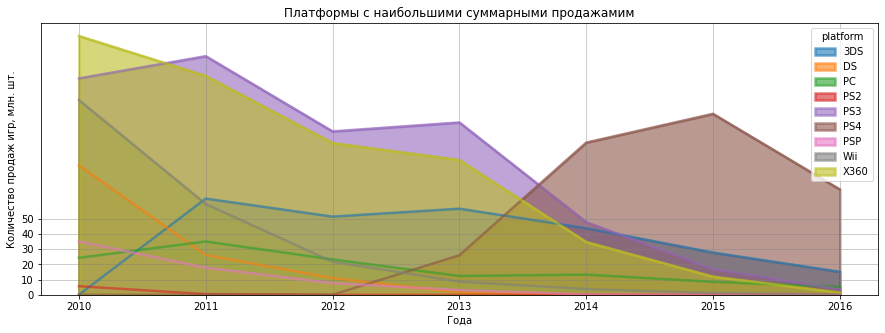

In [ ]:
df_actual_group.plot.area(stacked=False, figsize=(15, 5), alpha=.6, linewidth=2.5)
plt.title('Платформы с наибольшими суммарными продажамим')
plt.ylabel('Количество продаж игр, млн. шт.')
plt.xlabel('Года')
plt.grid(color='grey', axis='both', alpha=.5)
plt.yticks(np.arange(0, 60, 10))
plt.xticks(np.arange(2010, 2017, 1))
plt.show()

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

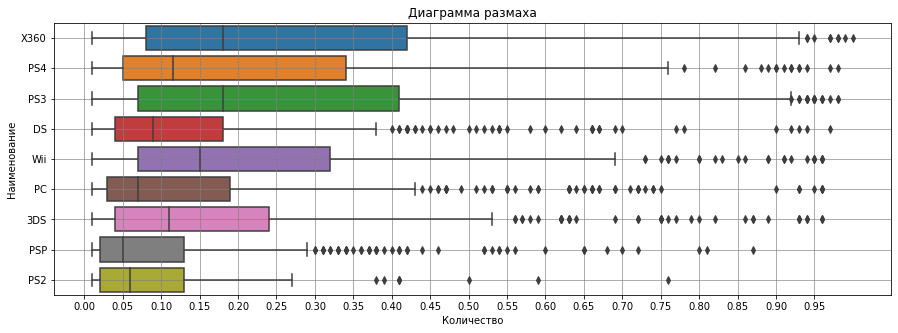

In [ ]:
plt.rcParams['figure.figsize']=(15, 5)
sns.boxplot(x=df_actual['total_sales'][df_actual['total_sales'] < 1], 
            y=df_actual["platform"][df_actual['total_sales'] < 1], 
            orient="h")
plt.title('Диаграмма размаха')
plt.ylabel('Наименование')
plt.xlabel('Количество')
plt.grid(color='grey', axis='both', alpha=.8)
plt.xticks(np.arange(0, 1, .05))
plt.show()

In [ ]:
df_actual.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000,4454.000000
mean,2011.999551,0.221536,0.168707,0.060608,0.054070,69.506240,6.898033,0.504921
std,1.934360,0.640276,0.492522,0.241981,0.161059,9.036364,1.075905,1.301978
min,2010.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2010.000000,0.000000,0.000000,0.000000,0.000000,68.994363,7.100000,0.050000
50%,2011.000000,0.050000,0.030000,0.000000,0.010000,68.994363,7.126330,0.140000
75%,2013.000000,0.180000,0.130000,0.040000,0.040000,70.000000,7.126330,0.420000
max,2016.000000,15.000000,9.090000,5.650000,3.960000,97.000000,9.300000,21.820000


In [ ]:
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.000000,6.30000,E,21.82
1,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.20000,M,21.05
2,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.10000,M,16.27
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,68.994363,7.12633,NaN,15.13
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.000000,3.40000,M,14.73


#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [ ]:
df_actual_ps4 = df_actual[df_actual['platform'] == 'PS4']

In [ ]:
df_actual_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,68.994363,7.12633,NaN,14.63
13,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.000000,8.30000,M,12.62
27,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.000000,4.30000,E,8.58
31,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,68.994363,7.12633,NaN,7.98
32,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.000000,5.70000,M,7.66


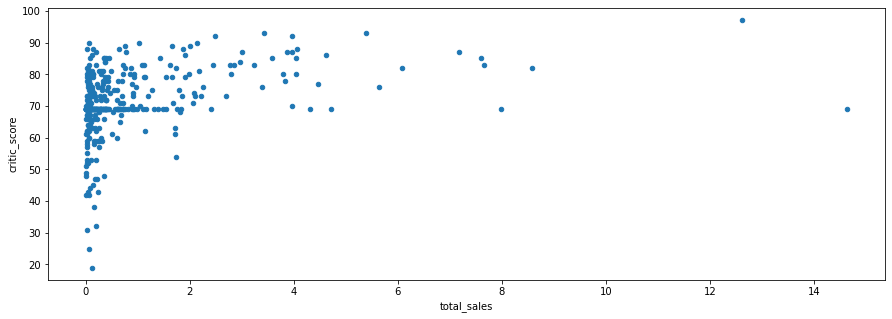

In [ ]:
df_actual_ps4.plot(x='total_sales', y='critic_score', kind='scatter')

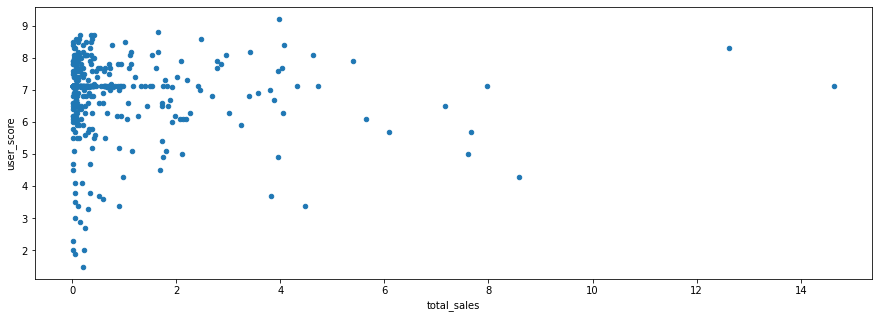

In [ ]:
df_actual_ps4.plot(x='total_sales', y='user_score', kind='scatter')

In [ ]:
df_actual_ps4['total_sales'].corr(df_actual_ps4['critic_score'])

0.3488963883620061

In [ ]:
df_actual_ps4['total_sales'].corr(df_actual_ps4['user_score'])

-0.04545391610787771

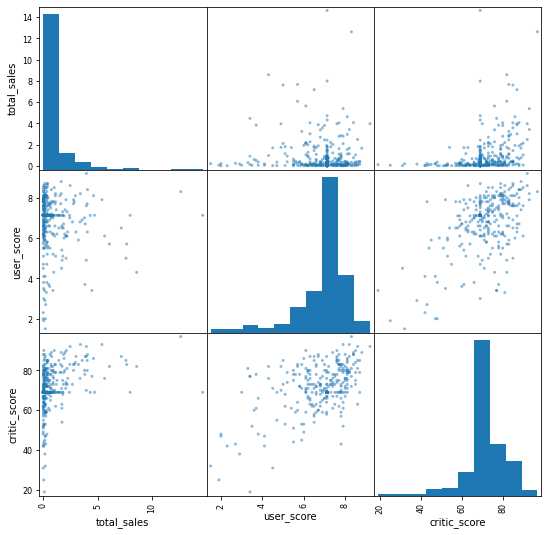

In [ ]:
pd.plotting.scatter_matrix(df_actual_ps4[['total_sales', 'user_score', 'critic_score']], figsize=(9, 9))
plt.show()

#### Соотнесите выводы с продажами игр на других платформах.

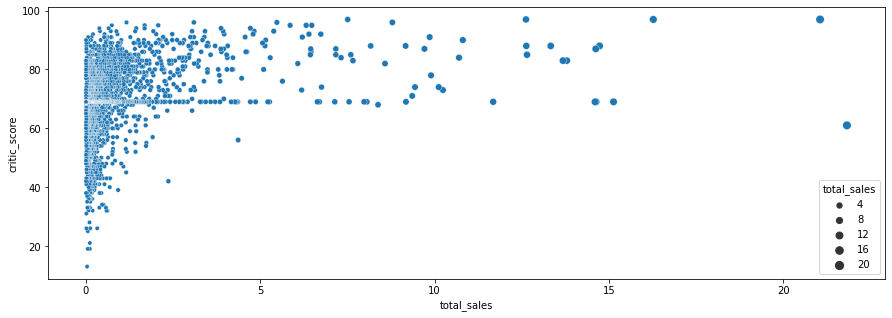

In [ ]:
sns.scatterplot(data=df_actual, x="total_sales", y="critic_score", size="total_sales")

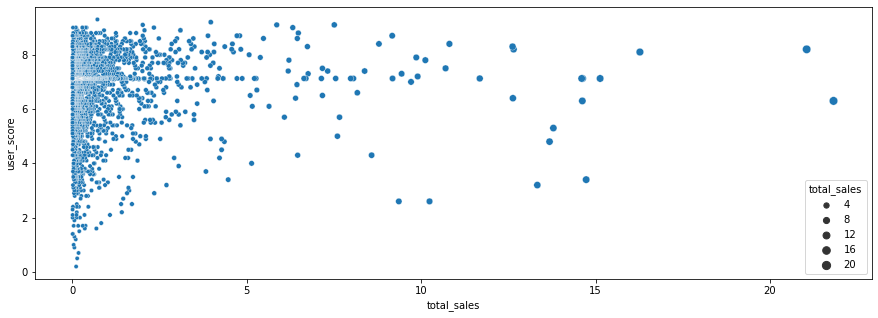

In [ ]:
sns.scatterplot(data=df_actual, x="total_sales", y="user_score", size="total_sales")

In [ ]:
df_actual['total_sales'].corr(df_actual['critic_score'])

0.28791001548233325

In [ ]:
df_actual['total_sales'].corr(df_actual['user_score'])

0.0027153771900134166

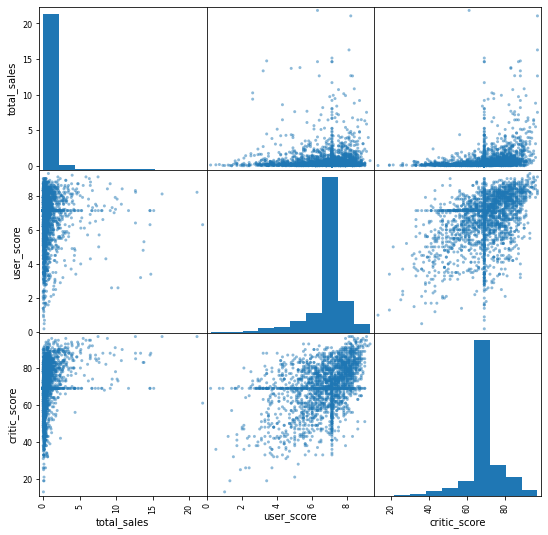

In [ ]:
pd.plotting.scatter_matrix(df_actual[['total_sales', 'user_score', 'critic_score']], figsize=(9, 9))
plt.show()

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

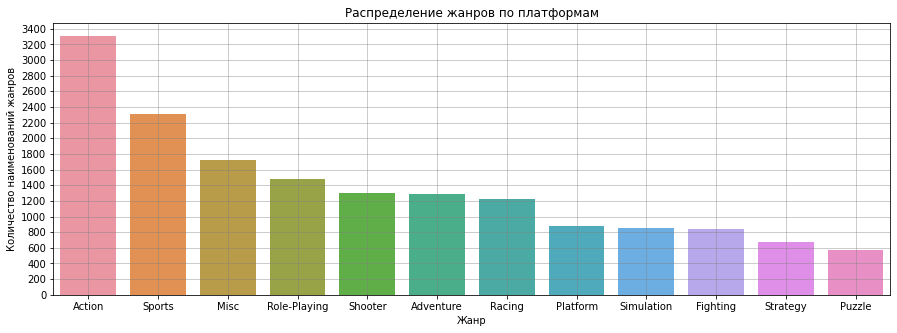

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x='genre', data=df, order = df['genre'].value_counts().index)
plt.title('Распределение жанров по платформам')
plt.ylabel('Количество наименований жанров')
plt.xlabel('Жанр')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.yticks(np.arange(0, 3500, 200))
plt.show()

In [ ]:
df_genre_sales = df.pivot_table(values='total_sales', index='genre', aggfunc='sum').sort_values(by='total_sales', ascending=False)

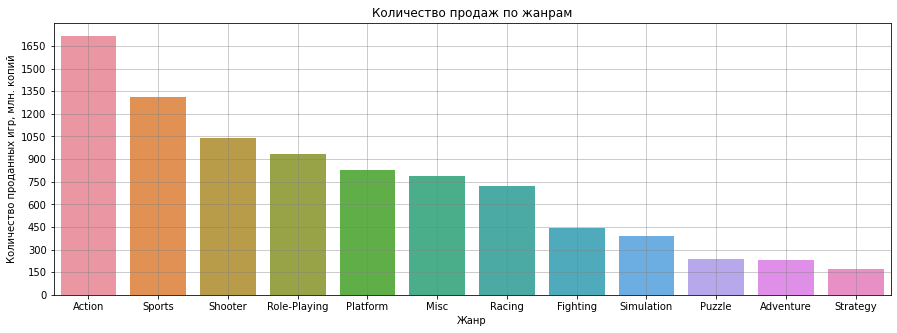

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_genre_sales, x=df_genre_sales.index, y="total_sales")
plt.title('Количество продаж по жанрам')
plt.ylabel('Количество проданных игр, млн. копий')
plt.xlabel('Жанр')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.yticks(np.arange(0, 1800, 150))
plt.show()

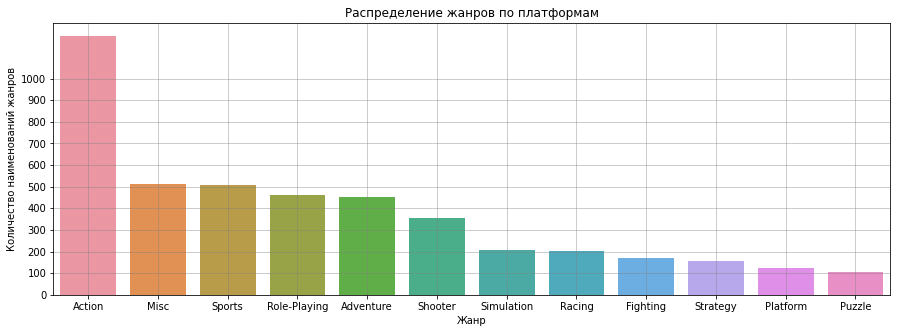

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x='genre', data=df_actual, order = df_actual['genre'].value_counts().index)
plt.title('Распределение жанров по платформам')
plt.ylabel('Количество наименований жанров')
plt.xlabel('Жанр')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.yticks(np.arange(0, 1100, 100))
plt.show()

In [ ]:
df_genre_sales = df_actual.pivot_table(values='total_sales', index='genre', aggfunc='sum').sort_values(by='total_sales', ascending=False)

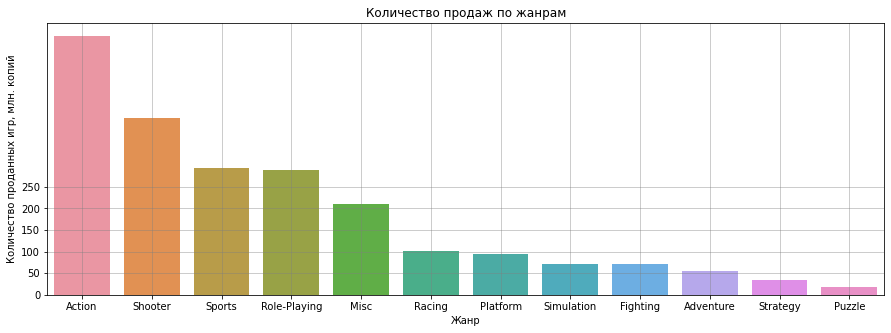

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_genre_sales, x=df_genre_sales.index, y="total_sales")
plt.title('Количество продаж по жанрам')
plt.ylabel('Количество проданных игр, млн. копий')
plt.xlabel('Жанр')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.yticks(np.arange(0, 300, 50))
plt.show()

## Шаг 4. Портрет пользователя каждого региона

In [ ]:
def topn(suptitle, index, maxyrange, numbertop):
  f, axs = plt.subplots(1, 4, figsize=(25, 5))

  plt.suptitle(suptitle)

  axs[0].set_title("В Америке")
  axs[0].bar(df_actual.pivot_table(index=index, values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(numbertop).index, 
              df_actual.pivot_table(index=index, values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)['na_sales'].head(numbertop))
  axs[0].grid(color='grey', axis='both', alpha=0.5)
  axs[0].set_yticks(np.arange(0, maxyrange, 25))
  axs[0].set_ylabel('Количество проданных игр, млн. шт.')
  axs[0].set_xlabel('Платформа')

  axs[1].set_title("В Европе")
  axs[1].bar(df_actual.pivot_table(index=index, values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(numbertop).index, 
              df_actual.pivot_table(index=index, values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)['eu_sales'].head(numbertop))
  axs[1].grid(color='grey', axis='both', alpha=0.5)
  axs[1].set_yticks(np.arange(0, maxyrange, 25))
  axs[1].set_ylabel('Количество проданных игр, млн. шт.')
  axs[1].set_xlabel('Платформа')

  axs[2].set_title("В Японии")
  axs[2].bar(df_actual.pivot_table(index=index, values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(numbertop).index, 
              df_actual.pivot_table(index=index, values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)['jp_sales'].head(numbertop))
  axs[2].grid(color='grey', axis='both', alpha=0.5)
  axs[2].set_yticks(np.arange(0, maxyrange, 25))
  axs[2].set_ylabel('Количество проданных игр, млн. шт.')
  axs[2].set_xlabel('Платформа')

  axs[3].set_title("В остальных регионах")
  axs[3].bar(df_actual.pivot_table(index=index, values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False).head(numbertop).index, 
              df_actual.pivot_table(index=index, values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False)['other_sales'].head(numbertop))
  axs[3].grid(color='grey', axis='both', alpha=0.5)
  axs[3].set_yticks(np.arange(0, maxyrange, 25))
  axs[3].set_ylabel('Количество проданных игр, млн. шт.')
  axs[3].set_xlabel('Платформа')

  plt.show()

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

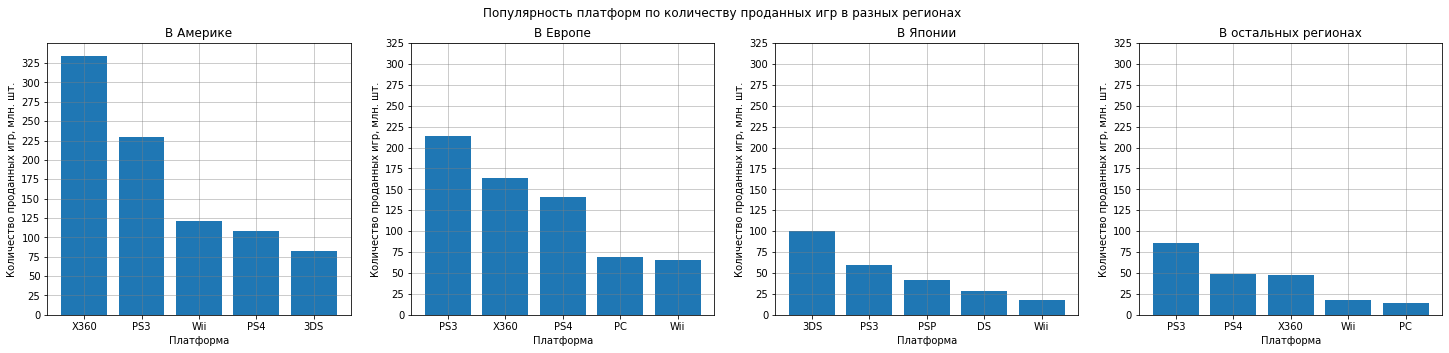

In [ ]:
topn('Популярность платформ по количеству проданных игр в разных регионах', 'platform', 350, 5)

### Самые популярные жанры (топ-5). Поясните разницу.

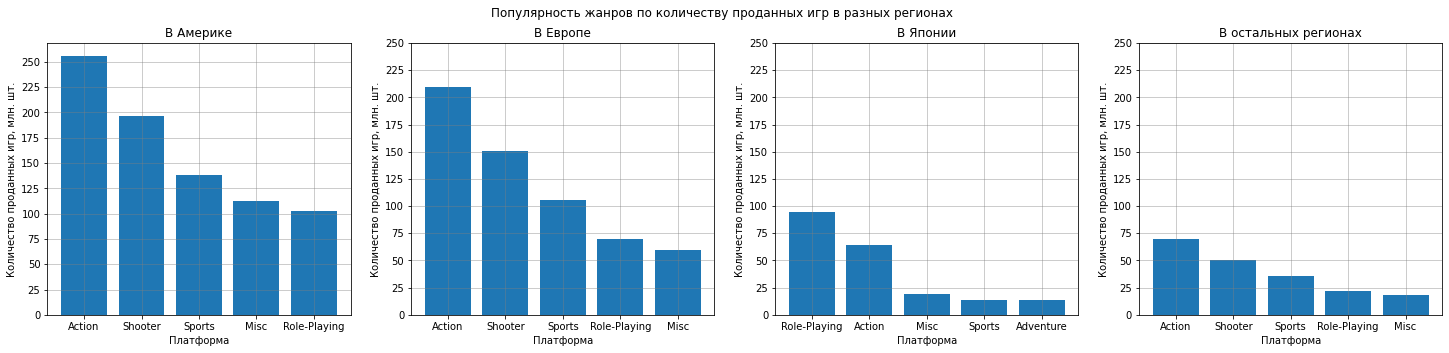

In [ ]:
topn('Популярность жанров по количеству проданных игр в разных регионах', 'genre', 275, 5)

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

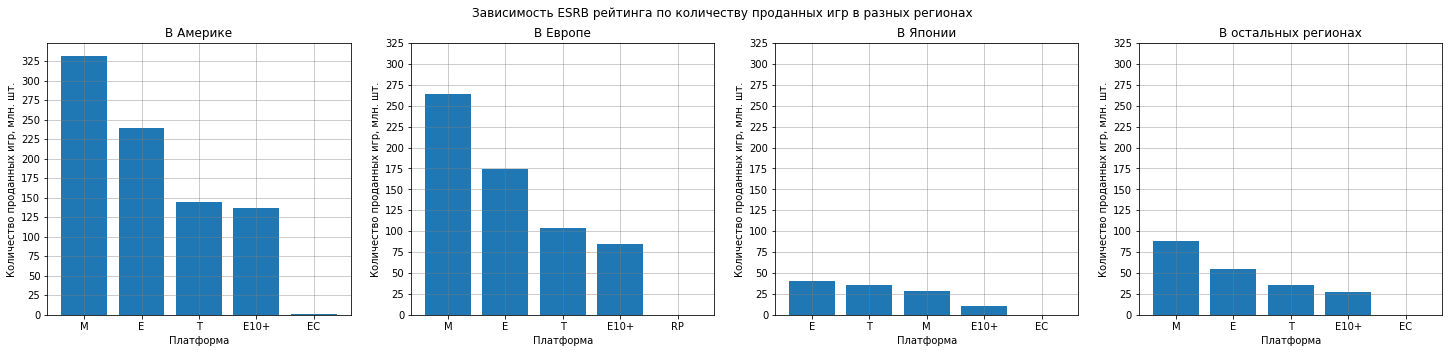

In [ ]:
topn('Зависимость ESRB рейтинга по количеству проданных игр в разных регионах', 'rating', 350, 5)

## Шаг 5. Проверка гипотез

Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Выбираем двустроннею гипотезу, так как значения меньше и больше также важны.  
За нулевую гипотезу H0 принимаем: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
За альтернативную H1 принимаем: средние пользовательские рейтинги платформ Xbox One и PC разлючаются;  
Уровень статической значимости берем: 5%.  

Проведем расчет:

In [ ]:
alpha = .05

results = st.ttest_ind(
    df['user_score'][df['platform'] == 'XOne'], 
    df['user_score'][df['platform'] == 'PC'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  3.050085067818482e-05
Отвергаем нулевую гипотезу


Проверим, расчитав средние выручки по тарифам:

In [ ]:
df['user_score'][df['platform'] == 'XOne'].mean()

6.680613130038012

In [ ]:
df['user_score'][df['platform'] == 'PC'].mean()

7.0787028616690035

### Средние пользовательские рейтинги жанров Action и Sports разные

Выбираем двустроннею гипотезу, так как значения меньше и больше также важны.  
За нулевую гипотезу H0 принимаем: cредние пользовательские рейтинги жанров Action и Sports одинаковые;  
За альтернативную H1 принимаем: cредние пользовательские рейтинги жанров Action и Sports разные;  
Уровень статической значимости берем: 5%.  

Проведем расчет:

In [ ]:
alpha = .05

results = st.ttest_ind(
    df['user_score'][df['genre'] == 'Action'], 
    df['user_score'][df['genre'] == 'Sports'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.12360284127624442
Не получилось отвергнуть нулевую гипотезу


Проверим, расчитав средние выручки по тарифам:

In [ ]:
df['user_score'][df['genre'] == 'Action'].mean()

7.089290737844808

In [ ]:
df['user_score'][df['genre'] == 'Sports'].mean()

7.0443426367421385

## Шаг 6. Вывод